
Cramer's Rule Solution
  Variable     Value
0        x  1.285714
1        y  2.142857
2        z  2.571429


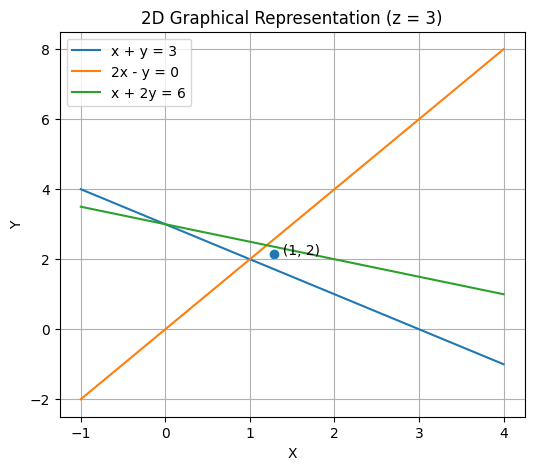

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Given System
# -----------------------------
A = np.array([
    [1, 1, 1],
    [2, -1, 1],
    [1, 2, -1]
], dtype=float)

B = np.array([6, 3, 3], dtype=float)

# -----------------------------
# Cramer's Rule
# -----------------------------
detA = np.linalg.det(A)

Ax = A.copy()
Ay = A.copy()
Az = A.copy()

Ax[:, 0] = B
Ay[:, 1] = B
Az[:, 2] = B

x = np.linalg.det(Ax) / detA
y = np.linalg.det(Ay) / detA
z = np.linalg.det(Az) / detA

solution_cramer = [x, y, z]

df_cramer = pd.DataFrame({
    'Variable': ['x', 'y', 'z'],
    'Value': solution_cramer
})

print("\nCramer's Rule Solution")
print(df_cramer)

# -----------------------------
# EASY 2D Graphical Representation
# (Fix z = solution value)
# -----------------------------
x_vals = np.linspace(-1, 4, 100)

# Reduced equations at z = 3
y1 = 3 - x_vals          # x + y = 3
y2 = 2 * x_vals          # 2x - y = 0
y3 = (6 - x_vals) / 2    # x + 2y = 6

plt.figure(figsize=(6,5))
plt.plot(x_vals, y1, label='x + y = 3')
plt.plot(x_vals, y2, label='2x - y = 0')
plt.plot(x_vals, y3, label='x + 2y = 6')

# Solution point
plt.scatter(x, y)
plt.text(x, y, f'  ({x:.0f}, {y:.0f})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("2D Graphical Representation (z = 3)")
plt.legend()
plt.grid(True)
plt.show()



Gauss Elimination Solution
  Variable     Value
0        x  1.285714
1        y  2.142857
2        z  2.571429


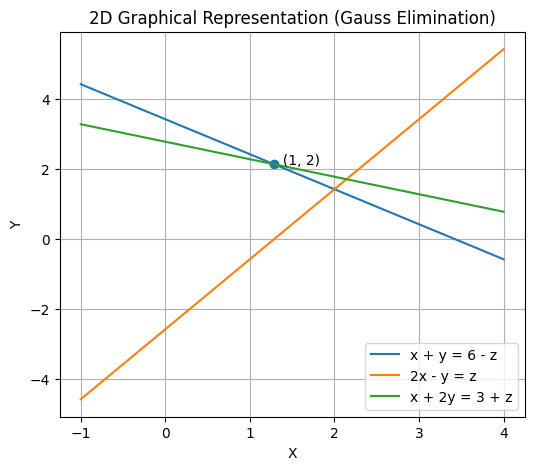

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Given System
# -----------------------------
A = np.array([
    [1, 1, 1],
    [2, -1, 1],
    [1, 2, -1]
], dtype=float)

B = np.array([6, 3, 3], dtype=float)

# -----------------------------
# Gauss Elimination
# -----------------------------
M = np.hstack([A, B.reshape(-1,1)])

n = 3
for i in range(n):
    for j in range(i+1, n):
        ratio = M[j][i] / M[i][i]
        M[j] = M[j] - ratio * M[i]

x = np.zeros(n)
for i in range(n-1, -1, -1):
    x[i] = (M[i][-1] - np.dot(M[i][i+1:n], x[i+1:])) / M[i][i]

df_gauss = pd.DataFrame({
    'Variable': ['x', 'y', 'z'],
    'Value': x
})

print("\nGauss Elimination Solution")
print(df_gauss)

# -----------------------------
# EASY 2D Graphical Representation
# (Fix z = solution value)
# -----------------------------
x_vals = np.linspace(-1, 4, 100)

# Fix z = solved value
z_val = x[2]

# Reduced equations
y1 = (6 - z_val) - x_vals          # x + y = 6 - z
y2 = 2 * x_vals - z_val            # 2x - y = z → y = 2x - z
y3 = (3 + z_val - x_vals) / 2      # x + 2y = 3 + z

plt.figure(figsize=(6,5))
plt.plot(x_vals, y1, label='x + y = 6 - z')
plt.plot(x_vals, y2, label='2x - y = z')
plt.plot(x_vals, y3, label='x + 2y = 3 + z')

# Solution point
plt.scatter(x[0], x[1])
plt.text(x[0], x[1], f'  ({x[0]:.0f}, {x[1]:.0f})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Graphical Representation (Gauss Elimination)')
plt.legend()
plt.grid(True)
plt.show()



Gauss-Jordan Solution
  Variable     Value
0        x  1.285714
1        y  2.142857
2        z  2.571429


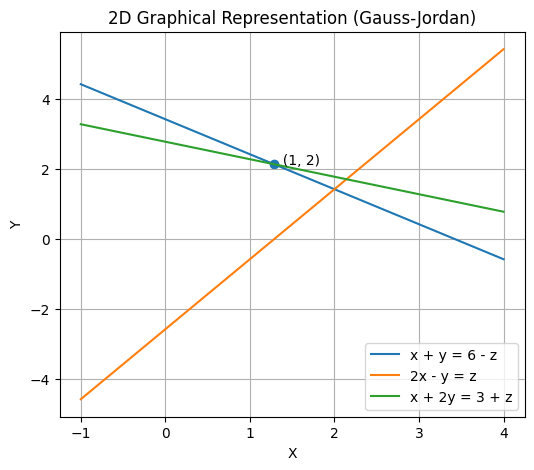

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Given System
# -----------------------------
A = np.array([
    [1, 1, 1],
    [2, -1, 1],
    [1, 2, -1]
], dtype=float)

B = np.array([6, 3, 3], dtype=float)

# -----------------------------
# Gauss-Jordan Method
# -----------------------------
M = np.hstack([A, B.reshape(-1,1)])

for i in range(3):
    M[i] = M[i] / M[i][i]   # Make pivot = 1
    for j in range(3):
        if i != j:
            M[j] = M[j] - M[j][i] * M[i]

solution_gj = M[:, -1]

df_gj = pd.DataFrame({
    'Variable': ['x', 'y', 'z'],
    'Value': solution_gj
})

print("\nGauss-Jordan Solution")
print(df_gj)

# -----------------------------
# EASY 2D Graphical Representation
# (Fix z = solution value)
# -----------------------------
x_vals = np.linspace(-1, 4, 100)

# Fix z = solved value
z_val = solution_gj[2]

# Reduced equations in 2D
y1 = (6 - z_val) - x_vals        # x + y = 6 - z
y2 = 2 * x_vals - z_val          # 2x - y = z → y = 2x - z
y3 = (3 + z_val - x_vals) / 2    # x + 2y = 3 + z

plt.figure(figsize=(6,5))
plt.plot(x_vals, y1, label='x + y = 6 - z')
plt.plot(x_vals, y2, label='2x - y = z')
plt.plot(x_vals, y3, label='x + 2y = 3 + z')

# Plot solution point
plt.scatter(solution_gj[0], solution_gj[1])
plt.text(solution_gj[0], solution_gj[1], 
         f'  ({solution_gj[0]:.0f}, {solution_gj[1]:.0f})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Graphical Representation (Gauss-Jordan)')
plt.legend()
plt.grid(True)
plt.show()